In [1]:
#data set (load breast_cancer data)
import sklearn.datasets as d
x = d.load_breast_cancer()

In [4]:
import pandas as pd
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
#training with SVM linear classification
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel = 'linear')

#using cross validation
X = x.data
y = x.target
scores = cross_val_score(svm_clf, X, y, cv = 5)
scores
pd.DataFrame(cross_validate(svm_clf, X, y, cv = 5))

,fit_time,score_time,test_score
0,0.656729,0.000521,0.947368
1,1.596998,0.000431,0.929825
2,0.913842,0.000443,0.973684
3,0.468527,0.000434,0.921053
4,0.854116,0.000428,0.955752


In [15]:
from sklearn.metrics import confusion_matrix
#training with SVM non-linear classification 
# using Radial Bias Function (rbf)
svm_clf2 = svm.SVC(kernel = 'rbf')
svm_clf2.fit(X,y)
svm_clf2.predict(X)
y_pred = svm_clf2.predict(X)
print(confusion_matrix(y, y_pred))

#cross validation
scores = cross_val_score(svm_clf2, X, y, cv = 5)
print('cross-validation mean', scores.mean())
pd.DataFrame(cross_validate(svm_clf2, X, y, cv = 5))

[[174  38]
 [  6 351]]
cross-validation mean 0.9121720229777983


,fit_time,score_time,test_score
0,0.002703,0.001035,0.850877
1,0.002439,0.000662,0.894737
2,0.002428,0.000645,0.929825
3,0.002403,0.000643,0.947368
4,0.002648,0.000892,0.938053


In [19]:
#standar scailing (mean = 0, std = 1)
X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]

from sklearn.preprocessing import StandardScaler

import sklearn.model_selection as ms

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# divide transformed X data
X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, test_size = 0.3, random_state = 100)

In [24]:
import sklearn.metrics as mt

#linear 
svm_clf = svm.SVC(kernel = 'linear')
scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
print('cross-validation mean: ', scores.mean())
pd.DataFrame(cross_validate(svm_clf, X_scaled, y, cv = 5))


cross-validation mean:  0.9701443875174661


,fit_time,score_time,test_score
0,0.002892,0.000652,0.956140
1,0.002219,0.000438,0.982456
2,0.002423,0.000380,0.964912
3,0.001907,0.000354,0.964912
4,0.002154,0.000680,0.982301


In [25]:
# hyper-parameter tunning (with GridSearchCV)
from sklearn.model_selection import GridSearchCV

svm_clf = svm.SVC(kernel = 'linear',random_state=100)

# tunning C (large C -> hard margin, small C -> soft margin)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
3,1.000,0.974873
1,0.010,0.969778
2,0.100,0.969778
4,10.000,0.957310
5,25.000,0.957278
6,50.000,0.957278
7,100.000,0.957278
0,0.001,0.947120


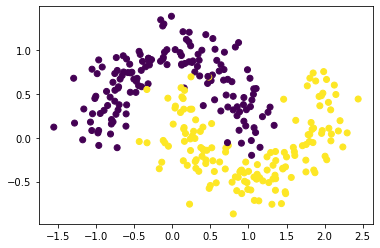

In [32]:
# non-linear classification
import sklearn.datasets as d
import matplotlib.pyplot as plt

#load dataset
X, y = d.make_moons(n_samples = 300, noise = 0.2)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [37]:
#split train/test data

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 100)

# linear 
svm_clf =svm.SVC(kernel = 'linear')

scores = cross_val_score(svm_clf, X, y, cv = 5)
print('cross_validation mean: ', scores.mean())
pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

cross_validation mean:  0.8566666666666667


,fit_time,score_time,test_score
0,0.001085,0.000369,0.850000
1,0.000959,0.000336,0.883333
2,0.000711,0.000377,0.816667
3,0.000818,0.000449,0.900000
4,0.001065,0.000766,0.833333


In [38]:
# non linear
svm_clf2 =svm.SVC(kernel = 'rbf')

scores = cross_val_score(svm_clf2, X, y, cv = 5)
print('cross_validation mean: ', scores.mean())
pd.DataFrame(cross_validate(svm_clf2, X, y, cv =5))

cross_validation mean:  0.96


,fit_time,score_time,test_score
0,0.001211,0.000434,0.983333
1,0.000906,0.000415,0.966667
2,0.001119,0.000577,0.933333
3,0.000918,0.000474,0.983333
4,0.000701,0.000318,0.933333
